## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN", "NAME"], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


# Reminder

* drop status
* drop special considerations
* *possibly use case

In [3]:
# Determine the number of unique values in each column.
application_df.nunique(axis=0)

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_df['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = ['T25','T14','T15','T29','T17','T2','T12','T13','T9']

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df['CLASSIFICATION'].value_counts()

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
application_df['CLASSIFICATION'].value_counts().loc[lambda x : x>1]
class_counts.index

Index(['C1000', 'C2000', 'C1200', 'C3000', 'C2100', 'C7000', 'C1700', 'C4000',
       'C5000', 'C1270', 'C2700', 'C2800', 'C7100', 'C1300', 'C1280', 'C1230',
       'C1400', 'C7200', 'C2300', 'C1240', 'C8000', 'C7120', 'C1500', 'C1800',
       'C6000', 'C1250', 'C8200', 'C1238', 'C1278', 'C1235', 'C1237', 'C7210',
       'C2400', 'C1720', 'C4100', 'C1257', 'C1600', 'C1260', 'C2710', 'C0',
       'C3200', 'C1234', 'C1246', 'C1267', 'C1256', 'C2190', 'C4200', 'C2600',
       'C5200', 'C1370', 'C1248', 'C6100', 'C1820', 'C1900', 'C1236', 'C3700',
       'C2570', 'C1580', 'C1245', 'C2500', 'C1570', 'C1283', 'C2380', 'C1732',
       'C1728', 'C2170', 'C4120', 'C8210', 'C2561', 'C4500', 'C2150'],
      dtype='object')

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = []
for c in class_counts.index:
  if class_counts[c] < 1883:
    classifications_to_replace.append(c)
classifications_to_replace



# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
dummy = pd.get_dummies(application_df)
dummy.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [10]:
# Split our preprocessed data into our features and target arrays
X = dummy.drop(['IS_SUCCESSFUL'],axis=1)
y = dummy['IS_SUCCESSFUL']
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

# Reminder

* possibly raise nuerons
* change some activations
* remove third layer
* lower epochs

In [12]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_features = len(X_train_scaled[0])
hidden_node1 = 160
hidden_node2 = 60
hidden_node3 = 30


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_node1, input_dim=num_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_node2, activation='relu'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_node3, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               7040      
                                                                 
 dense_1 (Dense)             (None, 60)                9660      
                                                                 
 dense_2 (Dense)             (None, 30)                1830      
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 18,561
Trainable params: 18,561
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=2000)

Epoch 1/2000
804/804 [==============================] - 3s 2ms/step - loss: 0.5674 - accuracy: 0.7218
Epoch 2/2000
804/804 [==============================] - 2s 2ms/step - loss: 0.5551 - accuracy: 0.7289
Epoch 3/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5516 - accuracy: 0.7301
Epoch 4/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5506 - accuracy: 0.7312
Epoch 5/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5491 - accuracy: 0.7318
Epoch 6/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5484 - accuracy: 0.7318
Epoch 7/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5468 - accuracy: 0.7336
Epoch 8/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5468 - accuracy: 0.7325
Epoch 9/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5458 - accuracy: 0.7337
Epoch 10/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.545

804/804 [==============================] - 1s 2ms/step - loss: 0.5336 - accuracy: 0.7400
Epoch 81/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5333 - accuracy: 0.7402
Epoch 82/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5333 - accuracy: 0.7400
Epoch 83/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5328 - accuracy: 0.7414
Epoch 84/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5327 - accuracy: 0.7408
Epoch 85/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5330 - accuracy: 0.7405
Epoch 86/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5338 - accuracy: 0.7407
Epoch 87/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5327 - accuracy: 0.7398
Epoch 88/2000
804/804 [==============================] - 2s 2ms/step - loss: 0.5330 - accuracy: 0.7405
Epoch 89/2000
804/804 [==============================] - 2s 2ms/step - loss: 0.5326 - a

804/804 [==============================] - 2s 2ms/step - loss: 0.5305 - accuracy: 0.7415
Epoch 160/2000
804/804 [==============================] - 2s 2ms/step - loss: 0.5309 - accuracy: 0.7414
Epoch 161/2000
804/804 [==============================] - 2s 2ms/step - loss: 0.5306 - accuracy: 0.7416
Epoch 162/2000
804/804 [==============================] - 2s 2ms/step - loss: 0.5306 - accuracy: 0.7424
Epoch 163/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5308 - accuracy: 0.7419
Epoch 164/2000
804/804 [==============================] - 2s 2ms/step - loss: 0.5299 - accuracy: 0.7416
Epoch 165/2000
804/804 [==============================] - 2s 2ms/step - loss: 0.5303 - accuracy: 0.7415
Epoch 166/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5310 - accuracy: 0.7413
Epoch 167/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5308 - accuracy: 0.7411
Epoch 168/2000
804/804 [==============================] - 1s 2ms/step - loss: 0

804/804 [==============================] - 1s 2ms/step - loss: 0.5311 - accuracy: 0.7418
Epoch 238/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5302 - accuracy: 0.7420
Epoch 239/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5308 - accuracy: 0.7421
Epoch 240/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5289 - accuracy: 0.7424
Epoch 241/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5289 - accuracy: 0.7422
Epoch 242/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5430 - accuracy: 0.7419
Epoch 243/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5309 - accuracy: 0.7418
Epoch 244/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5287 - accuracy: 0.7421
Epoch 245/2000
804/804 [==============================] - 2s 2ms/step - loss: 0.5283 - accuracy: 0.7421
Epoch 246/2000
804/804 [==============================] - 1s 2ms/step - loss: 0

804/804 [==============================] - 1s 2ms/step - loss: 0.5289 - accuracy: 0.7422
Epoch 316/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5282 - accuracy: 0.7420
Epoch 317/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5287 - accuracy: 0.7425
Epoch 318/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5282 - accuracy: 0.7426
Epoch 319/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5287 - accuracy: 0.7425
Epoch 320/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5284 - accuracy: 0.7426
Epoch 321/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5298 - accuracy: 0.7424
Epoch 322/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5288 - accuracy: 0.7426
Epoch 323/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5285 - accuracy: 0.7424
Epoch 324/2000
804/804 [==============================] - 1s 2ms/step - loss: 0

804/804 [==============================] - 2s 3ms/step - loss: 0.5284 - accuracy: 0.7425
Epoch 394/2000
804/804 [==============================] - 2s 2ms/step - loss: 0.5284 - accuracy: 0.7425
Epoch 395/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5300 - accuracy: 0.7422
Epoch 396/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5294 - accuracy: 0.7425
Epoch 397/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5277 - accuracy: 0.7425
Epoch 398/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5280 - accuracy: 0.7425
Epoch 399/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5281 - accuracy: 0.7428
Epoch 400/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5279 - accuracy: 0.7426
Epoch 401/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5282 - accuracy: 0.7426
Epoch 402/2000
804/804 [==============================] - 1s 2ms/step - loss: 0

804/804 [==============================] - 1s 2ms/step - loss: 0.5279 - accuracy: 0.7427
Epoch 472/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5278 - accuracy: 0.7425
Epoch 473/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5276 - accuracy: 0.7431
Epoch 474/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5280 - accuracy: 0.7423
Epoch 475/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5277 - accuracy: 0.7427
Epoch 476/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5278 - accuracy: 0.7432
Epoch 477/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5281 - accuracy: 0.7424
Epoch 478/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5286 - accuracy: 0.7422
Epoch 479/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5286 - accuracy: 0.7423
Epoch 480/2000
804/804 [==============================] - 1s 2ms/step - loss: 0

804/804 [==============================] - 2s 2ms/step - loss: 0.5305 - accuracy: 0.7427
Epoch 550/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5274 - accuracy: 0.7437
Epoch 551/2000
804/804 [==============================] - 2s 2ms/step - loss: 0.5270 - accuracy: 0.7437
Epoch 552/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5270 - accuracy: 0.7428
Epoch 553/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5275 - accuracy: 0.7434
Epoch 554/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5276 - accuracy: 0.7436
Epoch 555/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5277 - accuracy: 0.7437
Epoch 556/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5275 - accuracy: 0.7433
Epoch 557/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5271 - accuracy: 0.7437
Epoch 558/2000
804/804 [==============================] - 1s 2ms/step - loss: 0

804/804 [==============================] - 2s 2ms/step - loss: 0.5283 - accuracy: 0.7434
Epoch 628/2000
804/804 [==============================] - 2s 2ms/step - loss: 0.5276 - accuracy: 0.7432
Epoch 629/2000
804/804 [==============================] - 2s 2ms/step - loss: 0.5267 - accuracy: 0.7427
Epoch 630/2000
804/804 [==============================] - 2s 2ms/step - loss: 0.5280 - accuracy: 0.7433
Epoch 631/2000
804/804 [==============================] - 2s 2ms/step - loss: 0.5583 - accuracy: 0.7422
Epoch 632/2000
804/804 [==============================] - 2s 2ms/step - loss: 0.5275 - accuracy: 0.7422
Epoch 633/2000
804/804 [==============================] - 2s 2ms/step - loss: 0.5267 - accuracy: 0.7430
Epoch 634/2000
804/804 [==============================] - 2s 2ms/step - loss: 0.5265 - accuracy: 0.7432
Epoch 635/2000
804/804 [==============================] - 2s 2ms/step - loss: 0.5265 - accuracy: 0.7437
Epoch 636/2000
804/804 [==============================] - 1s 2ms/step - loss: 0

804/804 [==============================] - 2s 2ms/step - loss: 0.5270 - accuracy: 0.7435
Epoch 706/2000
804/804 [==============================] - 2s 2ms/step - loss: 0.5263 - accuracy: 0.7432
Epoch 707/2000
804/804 [==============================] - 2s 2ms/step - loss: 0.5264 - accuracy: 0.7438
Epoch 708/2000
804/804 [==============================] - 2s 2ms/step - loss: 0.5268 - accuracy: 0.7432
Epoch 709/2000
804/804 [==============================] - 2s 3ms/step - loss: 0.5270 - accuracy: 0.7433
Epoch 710/2000
804/804 [==============================] - 2s 2ms/step - loss: 0.5265 - accuracy: 0.7431
Epoch 711/2000
804/804 [==============================] - 2s 2ms/step - loss: 0.5269 - accuracy: 0.7437
Epoch 712/2000
804/804 [==============================] - 2s 2ms/step - loss: 0.5266 - accuracy: 0.7429
Epoch 713/2000
804/804 [==============================] - 2s 2ms/step - loss: 0.5269 - accuracy: 0.7434
Epoch 714/2000
804/804 [==============================] - 1s 2ms/step - loss: 0

804/804 [==============================] - 1s 2ms/step - loss: 0.5268 - accuracy: 0.7447
Epoch 784/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5273 - accuracy: 0.7435
Epoch 785/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5264 - accuracy: 0.7430
Epoch 786/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5264 - accuracy: 0.7437
Epoch 787/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5266 - accuracy: 0.7438
Epoch 788/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5262 - accuracy: 0.7439
Epoch 789/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5268 - accuracy: 0.7435
Epoch 790/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.6877 - accuracy: 0.7420
Epoch 791/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5279 - accuracy: 0.7437
Epoch 792/2000
804/804 [==============================] - 1s 2ms/step - loss: 0

804/804 [==============================] - 1s 2ms/step - loss: 0.5256 - accuracy: 0.7437
Epoch 862/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5263 - accuracy: 0.7437
Epoch 863/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5261 - accuracy: 0.7442
Epoch 864/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5255 - accuracy: 0.7440
Epoch 865/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5271 - accuracy: 0.7437
Epoch 866/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5266 - accuracy: 0.7438
Epoch 867/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5273 - accuracy: 0.7439
Epoch 868/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5264 - accuracy: 0.7444
Epoch 869/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5257 - accuracy: 0.7435
Epoch 870/2000
804/804 [==============================] - 1s 2ms/step - loss: 0

804/804 [==============================] - 2s 2ms/step - loss: 0.5257 - accuracy: 0.7442
Epoch 940/2000
804/804 [==============================] - 2s 2ms/step - loss: 0.5254 - accuracy: 0.7447
Epoch 941/2000
804/804 [==============================] - 2s 2ms/step - loss: 0.5261 - accuracy: 0.7442
Epoch 942/2000
804/804 [==============================] - 2s 2ms/step - loss: 0.5259 - accuracy: 0.7442
Epoch 943/2000
804/804 [==============================] - 2s 2ms/step - loss: 0.5262 - accuracy: 0.7448
Epoch 944/2000
804/804 [==============================] - 2s 2ms/step - loss: 0.5264 - accuracy: 0.7439
Epoch 945/2000
804/804 [==============================] - 2s 2ms/step - loss: 0.5254 - accuracy: 0.7439
Epoch 946/2000
804/804 [==============================] - 2s 2ms/step - loss: 0.5257 - accuracy: 0.7448
Epoch 947/2000
804/804 [==============================] - 2s 2ms/step - loss: 0.5264 - accuracy: 0.7434
Epoch 948/2000
804/804 [==============================] - 2s 2ms/step - loss: 0

804/804 [==============================] - 1s 2ms/step - loss: 0.5255 - accuracy: 0.7451
Epoch 1018/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5261 - accuracy: 0.7447
Epoch 1019/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5254 - accuracy: 0.7441
Epoch 1020/2000
804/804 [==============================] - 2s 2ms/step - loss: 0.5278 - accuracy: 0.7441
Epoch 1021/2000
804/804 [==============================] - 2s 2ms/step - loss: 0.5264 - accuracy: 0.7443
Epoch 1022/2000
804/804 [==============================] - 2s 2ms/step - loss: 0.5255 - accuracy: 0.7445
Epoch 1023/2000
804/804 [==============================] - 2s 2ms/step - loss: 0.5249 - accuracy: 0.7446
Epoch 1024/2000
804/804 [==============================] - 2s 2ms/step - loss: 0.5255 - accuracy: 0.7445
Epoch 1025/2000
804/804 [==============================] - 2s 2ms/step - loss: 0.5271 - accuracy: 0.7446
Epoch 1026/2000
804/804 [==============================] - 2s 2ms/step 

804/804 [==============================] - 1s 1ms/step - loss: 0.5251 - accuracy: 0.7449
Epoch 1096/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5283 - accuracy: 0.7445
Epoch 1097/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5295 - accuracy: 0.7445
Epoch 1098/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5261 - accuracy: 0.7443
Epoch 1099/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5247 - accuracy: 0.7451
Epoch 1100/2000
804/804 [==============================] - 2s 2ms/step - loss: 0.5244 - accuracy: 0.7448
Epoch 1101/2000
804/804 [==============================] - 2s 2ms/step - loss: 0.5256 - accuracy: 0.7454
Epoch 1102/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5264 - accuracy: 0.7444
Epoch 1103/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5249 - accuracy: 0.7452
Epoch 1104/2000
804/804 [==============================] - 1s 1ms/step 

804/804 [==============================] - 1s 1ms/step - loss: 0.5247 - accuracy: 0.7448
Epoch 1174/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5251 - accuracy: 0.7451
Epoch 1175/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5249 - accuracy: 0.7448
Epoch 1176/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5261 - accuracy: 0.7446
Epoch 1177/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5253 - accuracy: 0.7444
Epoch 1178/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5258 - accuracy: 0.7446
Epoch 1179/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5246 - accuracy: 0.7446
Epoch 1180/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5259 - accuracy: 0.7445
Epoch 1181/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5256 - accuracy: 0.7442
Epoch 1182/2000
804/804 [==============================] - 1s 2ms/step 

804/804 [==============================] - 1s 2ms/step - loss: 0.5258 - accuracy: 0.7441
Epoch 1252/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5256 - accuracy: 0.7441
Epoch 1253/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5253 - accuracy: 0.7441
Epoch 1254/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5252 - accuracy: 0.7438
Epoch 1255/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5253 - accuracy: 0.7434
Epoch 1256/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5256 - accuracy: 0.7443
Epoch 1257/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5253 - accuracy: 0.7442
Epoch 1258/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5251 - accuracy: 0.7442
Epoch 1259/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5254 - accuracy: 0.7447
Epoch 1260/2000
804/804 [==============================] - 1s 2ms/step 

804/804 [==============================] - 1s 2ms/step - loss: 0.5258 - accuracy: 0.7442
Epoch 1330/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5252 - accuracy: 0.7448
Epoch 1331/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5317 - accuracy: 0.7441
Epoch 1332/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5256 - accuracy: 0.7444
Epoch 1333/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5248 - accuracy: 0.7440
Epoch 1334/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5257 - accuracy: 0.7445
Epoch 1335/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5250 - accuracy: 0.7452
Epoch 1336/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5248 - accuracy: 0.7444
Epoch 1337/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5254 - accuracy: 0.7455
Epoch 1338/2000
804/804 [==============================] - 1s 2ms/step 

804/804 [==============================] - 1s 1ms/step - loss: 0.5250 - accuracy: 0.7448
Epoch 1408/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5266 - accuracy: 0.7448
Epoch 1409/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5263 - accuracy: 0.7442
Epoch 1410/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5247 - accuracy: 0.7444
Epoch 1411/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5251 - accuracy: 0.7442
Epoch 1412/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5260 - accuracy: 0.7441
Epoch 1413/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5251 - accuracy: 0.7445
Epoch 1414/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5249 - accuracy: 0.7445
Epoch 1415/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5268 - accuracy: 0.7447
Epoch 1416/2000
804/804 [==============================] - 1s 2ms/step 

804/804 [==============================] - 1s 2ms/step - loss: 0.5259 - accuracy: 0.7449
Epoch 1486/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5255 - accuracy: 0.7444
Epoch 1487/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5246 - accuracy: 0.7445
Epoch 1488/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5247 - accuracy: 0.7443
Epoch 1489/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5251 - accuracy: 0.7445
Epoch 1490/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5241 - accuracy: 0.7449
Epoch 1491/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5256 - accuracy: 0.7442
Epoch 1492/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5249 - accuracy: 0.7452
Epoch 1493/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5250 - accuracy: 0.7449
Epoch 1494/2000
804/804 [==============================] - 1s 2ms/step 

804/804 [==============================] - 1s 2ms/step - loss: 0.5278 - accuracy: 0.7445
Epoch 1564/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5247 - accuracy: 0.7440
Epoch 1565/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5245 - accuracy: 0.7453
Epoch 1566/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5249 - accuracy: 0.7446
Epoch 1567/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5271 - accuracy: 0.7444
Epoch 1568/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5261 - accuracy: 0.7447
Epoch 1569/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5255 - accuracy: 0.7451
Epoch 1570/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5244 - accuracy: 0.7442
Epoch 1571/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5246 - accuracy: 0.7452
Epoch 1572/2000
804/804 [==============================] - 1s 2ms/step 

804/804 [==============================] - 1s 2ms/step - loss: 0.5248 - accuracy: 0.7451
Epoch 1642/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5250 - accuracy: 0.7451
Epoch 1643/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5243 - accuracy: 0.7448
Epoch 1644/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5254 - accuracy: 0.7444
Epoch 1645/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5249 - accuracy: 0.7443
Epoch 1646/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5247 - accuracy: 0.7447
Epoch 1647/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5293 - accuracy: 0.7455
Epoch 1648/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5269 - accuracy: 0.7447
Epoch 1649/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5279 - accuracy: 0.7433
Epoch 1650/2000
804/804 [==============================] - 1s 2ms/step 

804/804 [==============================] - 1s 2ms/step - loss: 0.5250 - accuracy: 0.7440
Epoch 1720/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5249 - accuracy: 0.7441
Epoch 1721/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5245 - accuracy: 0.7448
Epoch 1722/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5255 - accuracy: 0.7439
Epoch 1723/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5250 - accuracy: 0.7448
Epoch 1724/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5253 - accuracy: 0.7442
Epoch 1725/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5250 - accuracy: 0.7448
Epoch 1726/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5252 - accuracy: 0.7446
Epoch 1727/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5266 - accuracy: 0.7438
Epoch 1728/2000
804/804 [==============================] - 1s 2ms/step 

804/804 [==============================] - 1s 2ms/step - loss: 0.5250 - accuracy: 0.7439
Epoch 1798/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5251 - accuracy: 0.7444
Epoch 1799/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5242 - accuracy: 0.7443
Epoch 1800/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5248 - accuracy: 0.7448
Epoch 1801/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5276 - accuracy: 0.7435
Epoch 1802/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5323 - accuracy: 0.7434
Epoch 1803/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5250 - accuracy: 0.7444
Epoch 1804/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5248 - accuracy: 0.7445
Epoch 1805/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5247 - accuracy: 0.7444
Epoch 1806/2000
804/804 [==============================] - 1s 2ms/step 

804/804 [==============================] - 1s 2ms/step - loss: 0.5244 - accuracy: 0.7443
Epoch 1876/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5249 - accuracy: 0.7444
Epoch 1877/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5246 - accuracy: 0.7451
Epoch 1878/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5248 - accuracy: 0.7446
Epoch 1879/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5250 - accuracy: 0.7439
Epoch 1880/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5267 - accuracy: 0.7442
Epoch 1881/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5249 - accuracy: 0.7435
Epoch 1882/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5263 - accuracy: 0.7440
Epoch 1883/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5256 - accuracy: 0.7445
Epoch 1884/2000
804/804 [==============================] - 1s 2ms/step 

804/804 [==============================] - 1s 2ms/step - loss: 0.5254 - accuracy: 0.7435
Epoch 1954/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5253 - accuracy: 0.7432
Epoch 1955/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5254 - accuracy: 0.7437
Epoch 1956/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5252 - accuracy: 0.7432
Epoch 1957/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5250 - accuracy: 0.7439
Epoch 1958/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5252 - accuracy: 0.7441
Epoch 1959/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5246 - accuracy: 0.7442
Epoch 1960/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5248 - accuracy: 0.7442
Epoch 1961/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5268 - accuracy: 0.7446
Epoch 1962/2000
804/804 [==============================] - 1s 2ms/step 

In [15]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 1.0657 - accuracy: 0.7299 - 387ms/epoch - 1ms/step
Loss: 1.0656979084014893, Accuracy: 0.729912519454956


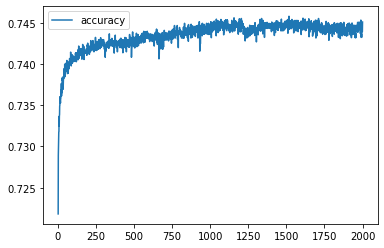

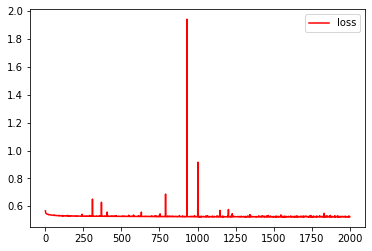

In [17]:
# Export our model to HDF5 file
history_df = pd.DataFrame(fit_model.history)
history_df.to_hdf('history/AlphabetSoupCharity_Optimization4.h5','df',mode='w',format='table')

# Plot the accuracy and loss of the model
history_df.index += 1
fig_acc = history_df.plot(y="accuracy")
fig_loss = history_df.plot(y="loss", color='red')
fig_acc.figure.savefig("images/acc_plot4.PNG")
fig_loss.figure.savefig("images/loss_plot4.PNG")